In [1]:
import pandas as pd
train_dir = "traffic_Data/DATA/" 

labels = pd.read_csv("labels.csv")


In [2]:
import os
lst = []
for i in labels.index:
    lst.append(len(os.listdir(train_dir + str(i))))
labels['count'] = lst
labels['count'].describe()

count     58.000000
mean      71.896552
std       83.818034
min        2.000000
25%       18.000000
50%       38.000000
75%      107.500000
max      446.000000
Name: count, dtype: float64

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense ,BatchNormalization, Dropout


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
image_size = 128

train_datagen = ImageDataGenerator(
        rescale = 1 / 255.,
        shear_range=10,
        zoom_range=0.2,                                       
        fill_mode="nearest",
        validation_split=0.25,
    )

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,          
    target_size = (64, 64), 
    batch_size = 32,
    shuffle=True,
    class_mode = "categorical",   
    subset = "training"     
)
validation_generator = train_datagen.flow_from_directory(
    directory = train_dir,   
    target_size = (64, 64),   
    batch_size = 32, 
    class_mode = "categorical",
    subset = "validation"
)


Found 3144 images belonging to 58 classes.
Found 1026 images belonging to 58 classes.


In [5]:
print(train_generator.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '6': 54, '7': 55, '8': 56, '9': 57}


In [6]:
num_classes = 58
image_size = 128
batch_size = 32

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(56, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
        train_generator,
        steps_per_epoch= 60,
        epochs = 12,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/12


c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.1697 - loss: 3.8939 - val_accuracy: 0.0375 - val_loss: 4.0308
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4573 - loss: 2.1122 - val_accuracy: 0.0125 - val_loss: 4.0681
Epoch 3/12


c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5742 - loss: 1.6162 - val_accuracy: 0.0188 - val_loss: 4.4711
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6359 - loss: 1.2883 - val_accuracy: 0.0250 - val_loss: 4.5637
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6975 - loss: 1.1260 - val_accuracy: 0.0750 - val_loss: 4.1698
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7824 - loss: 0.8357 - val_accuracy: 0.1625 - val_loss: 3.4927
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8064 - loss: 0.6958 - val_accuracy: 0.4848 - val_loss: 2.2331
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8284 - loss: 0.6337 - val_accuracy: 0.5437 - val_loss: 1.7193
Epoch 9/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8340 - loss: 0.5758 - val_accuracy: 0.7000 - val_loss: 1.0190
Epoch 10/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8579 - loss: 0.4684 - val_accuracy: 0.8562 - val_loss: 0

In [17]:
acc=history.history['accuracy']
acc

[0.27426159381866455,
 0.47996795177459717,
 0.6072916388511658,
 0.6462418437004089,
 0.7278481125831604,
 0.7884615659713745,
 0.8020833134651184,
 0.8292483687400818,
 0.8348958492279053,
 0.8594771027565002,
 0.8702531456947327,
 0.870192289352417]

In [21]:
accuracy=model.evaluate(validation_generator)
accuracy

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9756 - loss: 0.0934


[0.08550307899713516, 0.9766082167625427]

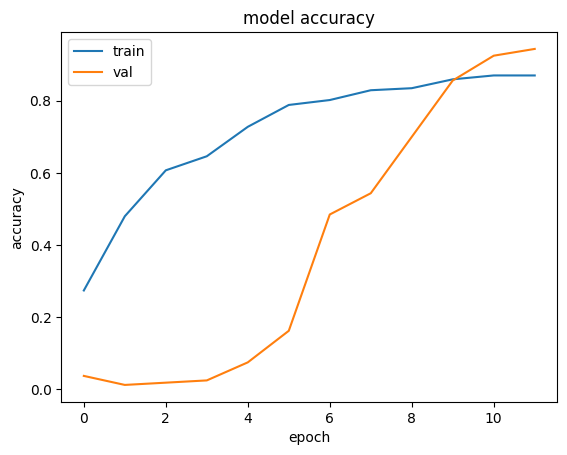

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

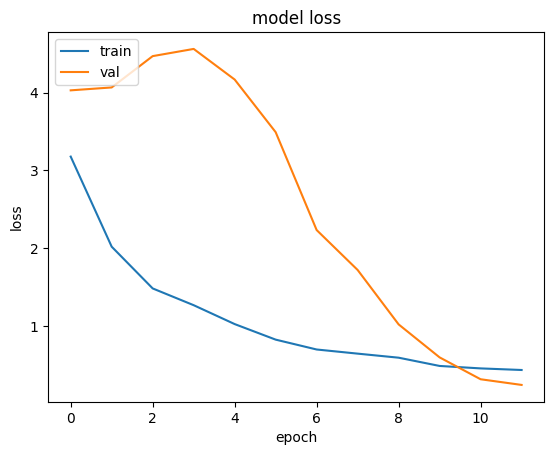

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

num_classes = 58

resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))
resnet_base.trainable = True

model2 = Sequential()
model2.add(resnet_base)
model2.add(GlobalAveragePooling2D())
model2.add(BatchNormalization())
model2.add(Dense(48, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [13]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history1 = model2.fit(
        train_generator,
        steps_per_epoch= 60,
        epochs = 12,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 446ms/step - accuracy: 0.2848 - loss: 3.1184 - val_accuracy: 0.0562 - val_loss: 3.8616
Epoch 2/12
39/60 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.6593 - loss: 1.4504

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - accuracy: 0.6734 - loss: 1.3871 - val_accuracy: 0.0625 - val_loss: 3.9966
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.7725 - loss: 0.9401 - val_accuracy: 0.1250 - val_loss: 4.0804
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.8098 - loss: 0.7434 - val_accuracy: 0.0188 - val_loss: 5.3088
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 380ms/step - accuracy: 0.8811 - loss: 0.4595 - val_accuracy: 0.0000e+00 - val_loss: 5.2286
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.8930 - loss: 0.3952 - val_accuracy: 0.0188 - val_loss: 5.1885
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.9246 - loss: 0.2689 - val_accuracy: 0.0000e+00 - val_loss: 6.5439
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.9007 - loss: 0.3888 - val_accuracy: 0.0000e+00 - val_loss: 5.7762
Epoch 9/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 376ms/step - accuracy: 0.9265 - loss: 0.2610 - val_acc

In [23]:
acc=history1.history['accuracy']
acc

[0.4345991611480713,
 0.6995192170143127,
 0.7837553024291992,
 0.8253205418586731,
 0.8739583492279053,
 0.8995097875595093,
 0.9240506291389465,
 0.9086538553237915,
 0.9272152185440063,
 0.9447115659713745,
 0.9409282803535461,
 0.9519230723381042]

In [24]:
accuracy=model2.evaluate(validation_generator)
accuracy

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.1738 - loss: 4.8774


[4.881251811981201, 0.17056530714035034]

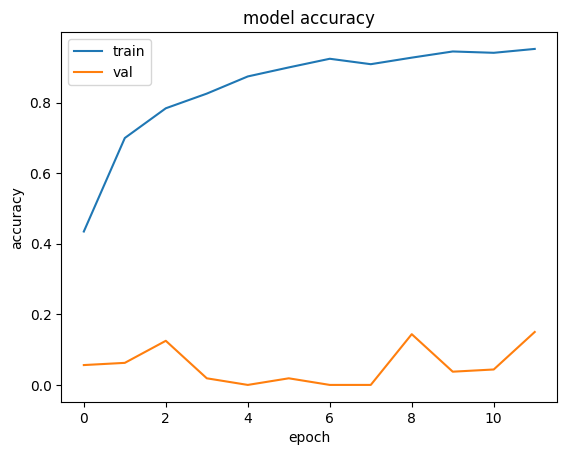

In [19]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

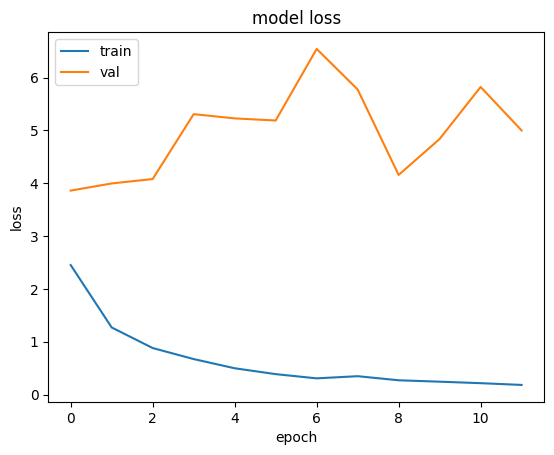

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()